## Dùng simple transformer cho regression task, dự đoán giá stock 
- https://simpletransformers.ai/docs/regression/.
- Dùng tin tức từ vneconomy, và giá stock VNINDEX, dự đoán giá dựa trên tin tức mới trong ngày.

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import mysql.connector

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    host='127.0.0.1',
    port=13306,
    user='root',
    password='root',
    database='pyml'
)

# Read the table data using pandas
query = "SELECT title, content, date FROM crawl_data where domain = 'https://vneconomy.vn/kinh-te-the-gioi.htm'"
df = pd.read_sql(query, connection)


/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_83193/2801794870.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [4]:
df.head()

,title,content,date
0,10 xe điện có tầm đi dài nhất năm 2023,\nNỗi quan ngại về tầm đi (range - quãng đường...,2023-06-08 10:57:00
1,Cử nhân thất nghiệp: “Vết sẹo” kinh tế Trung Quốc,\nNhiều người trong số họ chấp nhận công việc ...,2023-06-09 07:11:00
2,Giá vàng thế giới tăng mạnh nhờ đồng USD giảm ...,\nGiá vàng thế giới tăng mạnh trong phiên giao...,2023-06-09 10:31:00
3,20 thành phố đắt đỏ nhất thế giới với người nư...,\nTheo Xếp hạng Chi phí Sinh hoạt năm 2023 của...,2023-06-08 10:22:00
4,"S&P 500 đóng cửa cao nhất từ đầu năm, dầu sụt ...",\nChứng khoán Mỹ tăng điểm trong phiên giao dị...,2023-06-09 07:56:00


In [5]:
dfIndex = pd.read_csv('./data/vn_index.csv')
print(dfIndex.head())

# how to format date from '2023-06-08 10:57:00' to '09/06/2023' ?
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d/%m/%Y')
print(df.head())

         Ngày  Lần cuối        Mở       Cao      Thấp       KL % Thay đổi
0  09/06/2023  1,107.53  1,101.32  1,107.53  1,097.23  902.21K      0.56%
1  08/06/2023  1,101.32  1,109.54  1,115.14  1,101.32    1.32M     -0.74%
2  07/06/2023  1,109.54  1,108.31  1,112.28  1,104.26    1.00M      0.11%
3  06/06/2023  1,108.31  1,097.82  1,108.31  1,097.82  842.76K      0.96%
4  05/06/2023  1,097.82  1,090.84  1,103.81  1,090.84  948.36K      0.64%
                                               title  \
0             10 xe điện có tầm đi dài nhất năm 2023   
1  Cử nhân thất nghiệp: “Vết sẹo” kinh tế Trung Quốc   
2  Giá vàng thế giới tăng mạnh nhờ đồng USD giảm ...   
3  20 thành phố đắt đỏ nhất thế giới với người nư...   
4  S&P 500 đóng cửa cao nhất từ đầu năm, dầu sụt ...   

                                             content        date  
0  \nNỗi quan ngại về tầm đi (range - quãng đường...  08/06/2023  
1  \nNhiều người trong số họ chấp nhận công việc ...  09/06/2023  
2  \nGiá vàng thế 

In [6]:
# how to merge df and dfIndex by date and another column ?

dfMerge = pd.merge(df, dfIndex, left_on=['date'], right_on=['Ngày'], how='left')
print(dfMerge.head())

                                               title  \
0             10 xe điện có tầm đi dài nhất năm 2023   
1  Cử nhân thất nghiệp: “Vết sẹo” kinh tế Trung Quốc   
2  Giá vàng thế giới tăng mạnh nhờ đồng USD giảm ...   
3  20 thành phố đắt đỏ nhất thế giới với người nư...   
4  S&P 500 đóng cửa cao nhất từ đầu năm, dầu sụt ...   

                                             content        date        Ngày  \
0  \nNỗi quan ngại về tầm đi (range - quãng đường...  08/06/2023  08/06/2023   
1  \nNhiều người trong số họ chấp nhận công việc ...  09/06/2023  09/06/2023   
2  \nGiá vàng thế giới tăng mạnh trong phiên giao...  09/06/2023  09/06/2023   
3  \nTheo Xếp hạng Chi phí Sinh hoạt năm 2023 của...  08/06/2023  08/06/2023   
4  \nChứng khoán Mỹ tăng điểm trong phiên giao dị...  09/06/2023  09/06/2023   

   Lần cuối        Mở       Cao      Thấp       KL % Thay đổi  
0  1,101.32  1,109.54  1,115.14  1,101.32    1.32M     -0.74%  
1  1,107.53  1,101.32  1,107.53  1,097.23  902.21K    

In [7]:
df_sorted = dfMerge.sort_values(by='date', ascending=True)
print(df_sorted.head())

                                                 title  \
741  Tiền ảo 2023: Không chỉ là “mùa đông”, thậm ch...   
627  Giá vàng trong nước tiếp tục trượt dốc, thế gi...   
629  Các nhà đầu tư lớn “rón rén” quay trở lại thị ...   
630  Thế khó của Chủ tịch Fed trong cuộc họp báo ng...   
631  Đặt cược sai vào cổ phiếu ô tô điện, Amazon hứ...   

                                               content        date  \
741  \nTrong thế giới tiền ảo, các nhà đầu tư đã qu...  01/01/2023   
627  \nGiá vàng miếng trong nước sáng nay (1/2) tiế...  01/02/2023   
629  \nHãng tin Reuters dẫn số liệu từ công ty quản...  01/02/2023   
630  \nCuộc họp chính sách tiền tệ đầu tiên trong n...  01/02/2023   
631  \nTrong 9 tháng đầu năm 2022, Amazon ghi nhận ...  01/02/2023   

           Ngày  Lần cuối        Mở       Cao      Thấp     KL % Thay đổi  
741         NaN       NaN       NaN       NaN       NaN    NaN        NaN  
627  01/02/2023  1,075.97  1,111.18  1,116.96  1,075.97  1.03M     -3.17%  
62

741    -0.000291
627    -0.031700
629    -0.031700
630    -0.031700
631    -0.031700
637    -0.031700
620    -0.031700
626    -0.031700
621    -0.031700
628    -0.031700
490     0.015500
494     0.015500
489     0.015500
330    -0.000291
329    -0.000291
331    -0.000291
197    -0.000291
201    -0.000291
35      0.003000
41      0.003000
40      0.003000
38      0.003000
39      0.003000
36      0.003000
37      0.003000
1378   -0.000291
1377   -0.000291
1376   -0.000291
1374   -0.000291
1368   -0.000291
1370   -0.000291
1369   -0.000291
1372   -0.000291
1194   -0.000291
1198   -0.000291
1203   -0.000291
1032    0.005700
1033    0.005700
1034    0.005700
1035    0.005700
1037    0.005700
1038    0.005700
1042    0.005700
1036    0.005700
865    -0.011600
864    -0.011600
866    -0.011600
863    -0.011600
868    -0.011600
869    -0.011600
Name: change_percent, dtype: float64


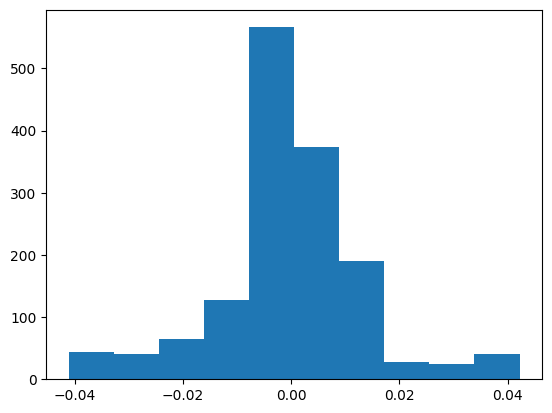

In [8]:
from sklearn.impute import SimpleImputer
import math
import numpy as np
# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Extract the column with missing values from the DataFrame
def convertToFloat(percentage_str):
    if type(percentage_str) == str:
        percentage_str = percentage_str.strip('%')
        # Convert to decimal.
        decimal_value = float(percentage_str) / 100
        return decimal_value
    else:
        return percentage_str

columnDiffValue = df_sorted['% Thay đổi'].apply(convertToFloat)

# Reshape the column to match the input requirements of SimpleImputer
column_reshaped = columnDiffValue.values.reshape(-1, 1)

# Fit the imputer on the column
imputer.fit(column_reshaped)

# Transform the column by filling missing values
column_filled = imputer.transform(column_reshaped)

# Replace the original column with the imputed values
df_sorted['change_percent'] = column_filled
print(df_sorted['change_percent'][:50])

import matplotlib.pyplot as plt

# Create a histogram of the column
plt.hist(df_sorted["change_percent"])

# Show the histogram
plt.show()


In [11]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data
train_data = df_sorted[['content', 'change_percent']]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Enabling regression
# Setting optional model configuration
model_args = ClassificationArgs()
model_args.num_train_epochs = 1
model_args.regression = True

# Create a ClassificationModel
model = ClassificationModel(
    "roberta",
    "roberta-base", use_cuda=False,
    num_labels=1,
    args=model_args
)

# Train the model
model.train_model(train_df)

# Evaluate the model
# result, model_outputs, wrong_predictions = model.eval_model(eval_df)




Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

  0%|          | 0/1498 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_128_1_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


(188, 0.0024849198741728113)

In [18]:
# Make predictions with the model
test_data = [
    """
    Chứng khoán Mỹ tụt điểm trước khi bước vào mùa báo cáo tài chính, giá dầu tăng nhẹ
    Sự lưỡng lự của nhà đầu tư diễn ra giữa lúc thị trường chờ đợi một chất xúc tác mới và bước vào tuần giao dịch cuối cùng của quý 2...
Thị trường chứng khoán Mỹ giảm điểm trong phiên giao dịch ngày thứ Hai (26/6), khi giới đầu tư thận trọng trước khi bước vào mùa báo cáo kết quả kinh doanh quý 2. Giá dầu thô tăng nhẹ sau mấy phiên giảm liên tiếp, trong bối cảnh mối lo về lãi suất tăng và nguy cơ suy thoái kinh tế toàn cầu còn ám ảnh tâm trí nhà đầu tư.
    """,
    "Nhà đầu tư cá nhân thờ ơ, vì sao giá Bitcoin vẫn lên cao nhất 1 năm?",
    "Minh định giữa gián đoạn thanh khoản và mất khả năng thanh toán trái phiếu doanh nghiệp",

]
predictions, raw_outputs = model.predict(test_data)
print('predictions: ', predictions)
print('raw_outputs: ', raw_outputs)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/3 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/1 [00:00<?, ?it/s]

predictions:  [0.00466498 0.00389154 0.00921591]
raw_outputs:  [0.00466498 0.00389154 0.00921591]


In [19]:
model.save_model("outputs/")